In [45]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
# import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import time


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

No missing values found.

Basic statistics:                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000

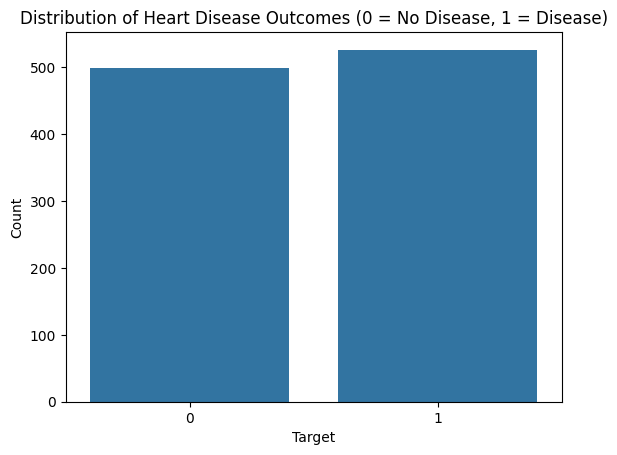


Model trained in 0.35 seconds.

Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



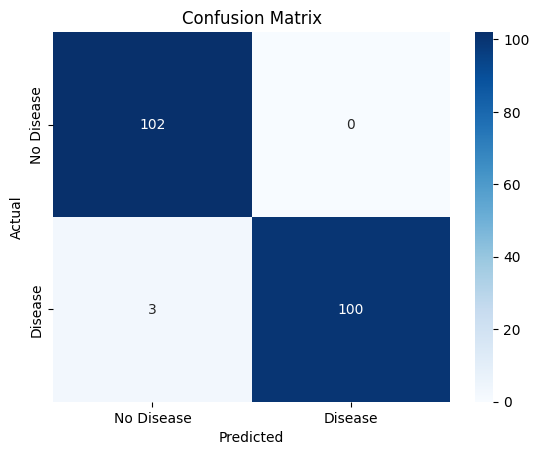

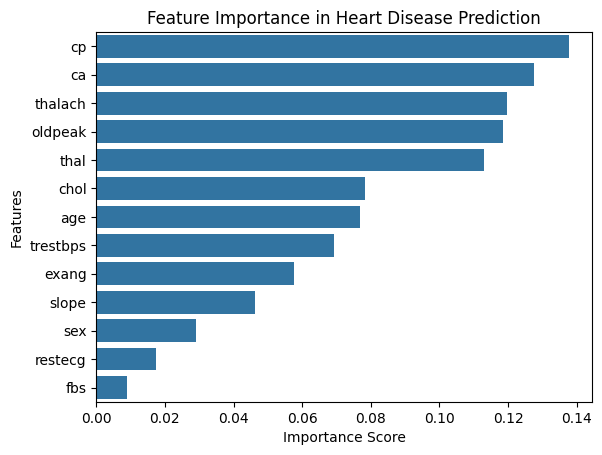


Model saved as heart_disease_model.pkl.


In [67]:

# Load the dataset
data = pd.read_csv("heart.csv")

# Display the first few rows
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
if missing_values.sum() > 0:
    print(f"\nMissing values:\n {missing_values}")
    data = data.dropna()  # Drop missing values
else:
    print(f"\nNo missing values found.")

# Basic statistics
print(f"\nBasic statistics: {data.describe()}")

# Histogram to visualize the distribution
sns.countplot(x='target', data=data)
plt.title("Distribution of Heart Disease Outcomes (0 = No Disease, 1 = Disease)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

# Assigning the lable as 'target'
X = data.drop("target", axis=1)
y = data["target"]

# Splitting data into training and testing set (80% = train, 20% = test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
start_time = time.time()
model.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"\nModel trained in {train_time:.2f} seconds.")

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["No Disease", "Disease"], 
            yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Bar plot to show which feautures were the most improrant (contributed the most) 
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance in Heart Disease Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Save the model
import joblib
model_filename = "heart_disease_model.pkl"
joblib.dump(model, model_filename)
print(f"\nModel saved as {model_filename}.")

# try:
#     # Load the trained model and scaler
#     loaded_model = joblib.load("heart_disease_model.pkl")
#     loaded_scaler = joblib.load("scaler.pkl")

#     # Transform X_test using the same scaler
#     X_test_scaled = loaded_scaler.transform(X_test)

#     # Make predictions
#     test_pred = loaded_model.predict(X_test_scaled)

#     # Verify predictions match
#     assert np.array_equal(y_pred, test_pred), "Model predictions do not match after loading!"

#     print("\n✅ Model successfully reloaded and verified!")

# except Exception as e:
#     print(f"\n❌ Error loading model: {e}")

First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

No missing values found.

Basic statistics:                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000

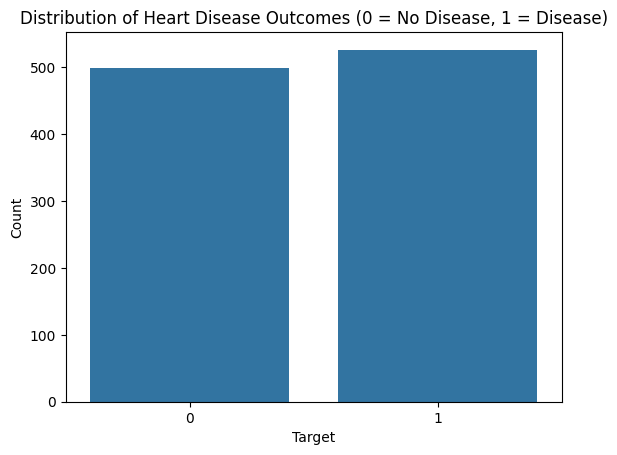


Model trained in 0.35 seconds.

Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



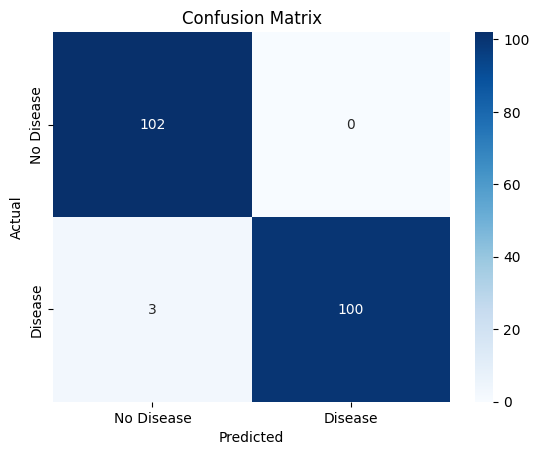

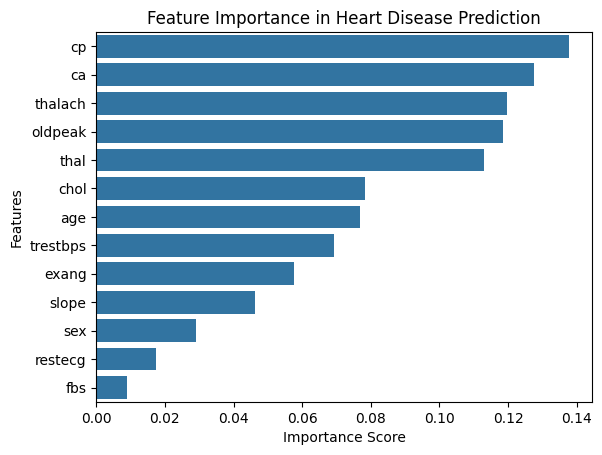


Model and scaler saved as heart_disease_model.pkl and scaler.pkl.

✅ Model successfully reloaded and verified!


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import joblib

# Load the dataset
data = pd.read_csv("heart.csv")

# Display the first few rows
print("First 5 rows of the dataset:")
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
if missing_values.sum() > 0:
    print(f"\nMissing values:\n {missing_values}")
    data = data.dropna()
else:
    print(f"\nNo missing values found.")

# Basic statistics
print(f"\nBasic statistics: {data.describe()}")

# Histogram to visualize the distribution
sns.countplot(x='target', data=data)
plt.title("Distribution of Heart Disease Outcomes (0 = No Disease, 1 = Disease)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

# Assigning features and labels
X = data.drop("target", axis=1)
y = data["target"]

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
start_time = time.time()
model.fit(X_train_scaled, y_train)
train_time = time.time() - start_time
print(f"\nModel trained in {train_time:.2f} seconds.")

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["No Disease", "Disease"], 
            yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature importance plot
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance in Heart Disease Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Save the model and scaler
model_filename = "heart_disease_model.pkl"
scaler_filename = "scaler.pkl"
joblib.dump(model, model_filename)
joblib.dump(scaler, scaler_filename)
print(f"\nModel and scaler saved as {model_filename} and {scaler_filename}.")

try:
    # Load the trained model and scaler
    loaded_model = joblib.load(model_filename)
    loaded_scaler = joblib.load(scaler_filename)

    # Use the ORIGINAL X_test (unscaled) from the split
    _, X_test_original, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

    # Transform the original X_test using the loaded scaler
    X_test_scaled_verified = loaded_scaler.transform(X_test_original)

    # Make predictions
    test_pred = loaded_model.predict(X_test_scaled_verified)

    # Verify predictions match
    assert np.array_equal(y_pred, test_pred), "Model predictions do not match after loading!"
    print("\n✅ Model successfully reloaded and verified!")

except Exception as e:
    print(f"\n❌ Error loading model: {e}")